In [6]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

file_path = '/content/drive/My Drive/iris.csv'
data = pd.read_csv(file_path)
data.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


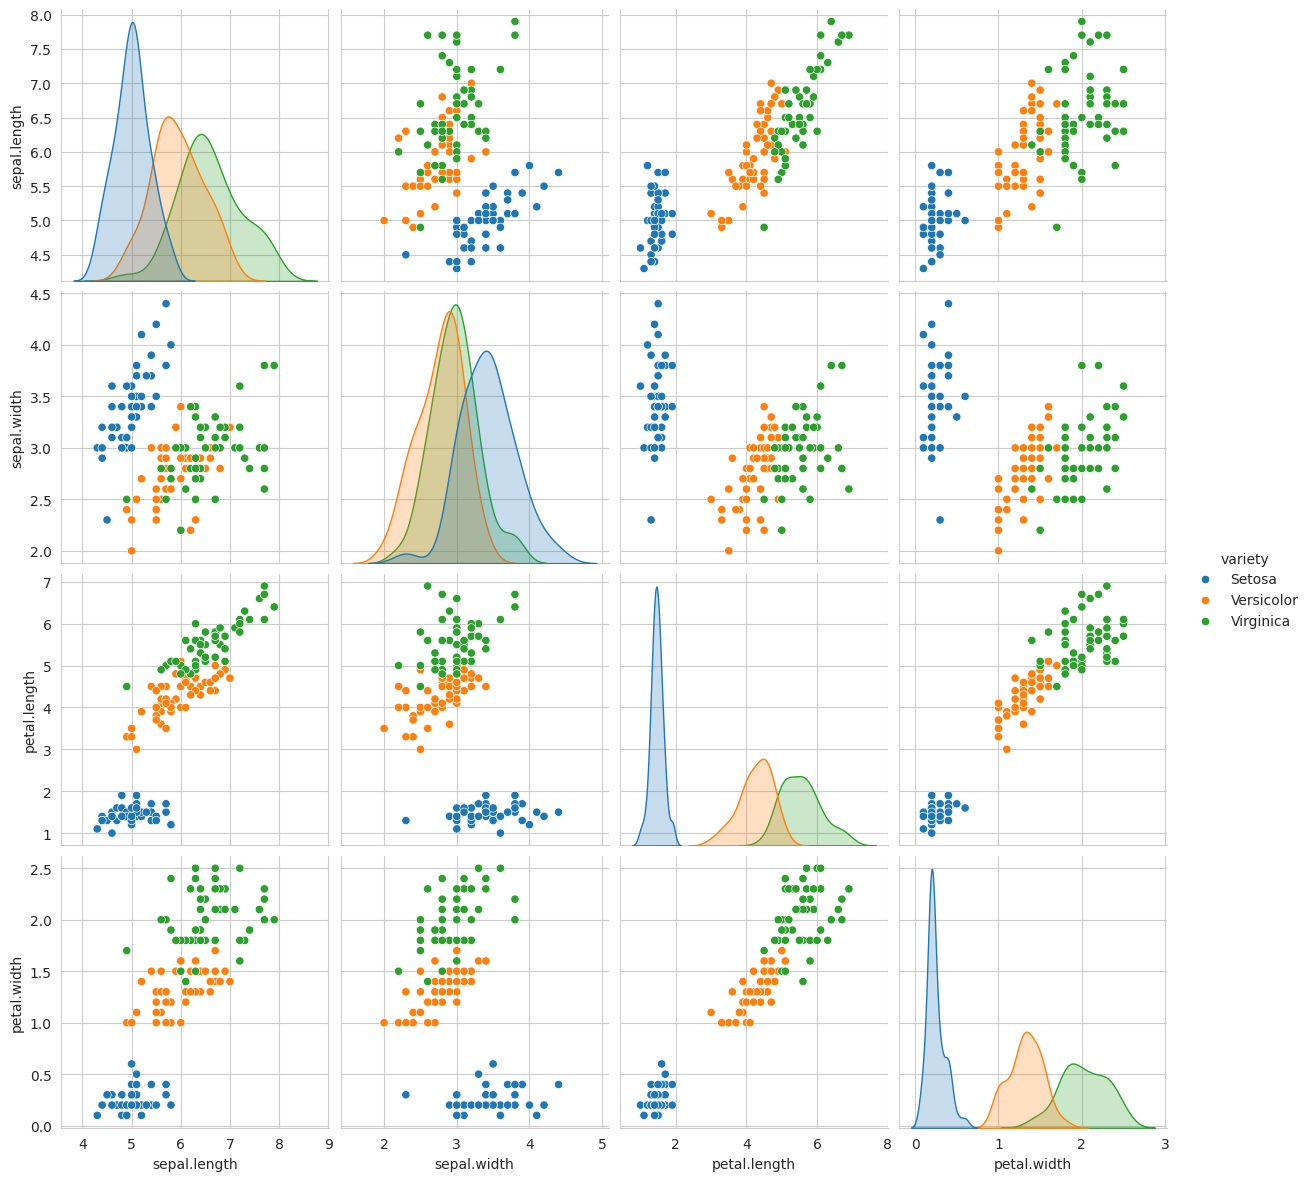

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.pairplot(data,hue="variety",height=3,aspect=1)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X, y = data.drop('variety', axis=1), data['variety']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Standardize the features first
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Then create and train the k-NN classifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)


In [28]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       0.79      1.00      0.88        15
   Virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45

Accuracy: 91.11%


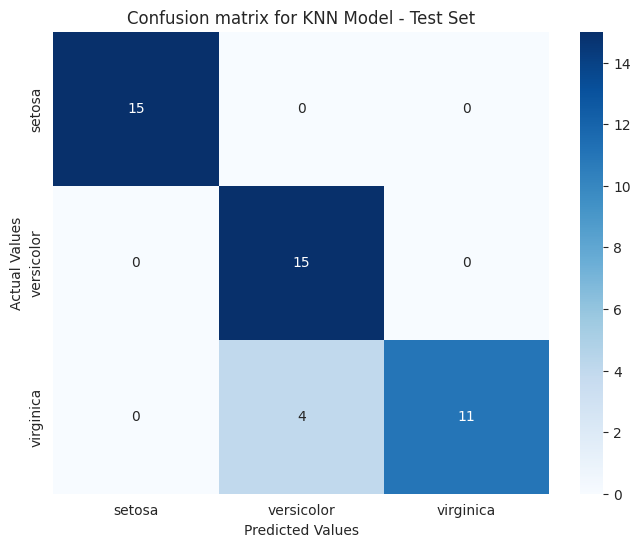

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix for KNN Model')
plt.title('Confusion matrix for KNN Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [46]:

# Get user input for a new sample
print("\nEnter the following features for the Iris flower (in cm):")
sepal_length = float(input("Sepal length: "))
sepal_width = float(input("Sepal width: "))
petal_length = float(input("Petal length: "))
petal_width = float(input("Petal width: "))

# Create the sample array from user input
user_sample = [[sepal_length, sepal_width, petal_length, petal_width]]

# Scale the input sample
user_sample_scaled = scaler.transform(user_sample)

# Predict the class for the input sample
predicted_class = knn.predict(user_sample_scaled)
print(f"\nPredicted class for the entered sample: {predicted_class[0]}\n\n")


Enter the following features for the Iris flower (in cm):
Sepal length: 11
Sepal width: 1
Petal length: 2
Petal width: 3

Predicted class for the entered sample: Virginica




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
